<a href="https://colab.research.google.com/github/LucasNSilveira/Hackathon-SantoDigital/blob/master/Desafio_engDados_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização 1
Crie um gráfico de linha mostrando a tendência das vendas totais ao longo do tempo (mensal). O gráfico deve destacar os meses de pico de vendas e adicionar uma linha de tendência para prever vendas futuras.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Carregar os dados
vendas = pd.read_csv("/content/drive/MyDrive/hackathon/adventureWorks_OK/AdventureWorks_Sales_corrected.csv")
vendas = vendas.drop(['StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey', 'TerritoryKey', 'OrderLineItem'], axis=1)
print(vendas.head())

    OrderDate  OrderQuantity
0  2015-01-01              1
1  2015-01-01              1
2  2015-01-01              1
3  2015-01-01              1
4  2015-01-02              1


In [11]:
# Converter a coluna 'OrderDate' para datetime
vendas['OrderDate'] = pd.to_datetime(vendas['OrderDate'])
vendas.set_index('OrderDate', inplace=True)

vendas_mes = vendas.resample('M').sum()
print(vendas_mes.head())

            OrderQuantity
OrderDate                
2015-01-31            184
2015-02-28            165
2015-03-31            198
2015-04-30            204
2015-05-31            206


In [14]:
# Criação da linha de tendência
vendas_mes['mes'] = np.arange(len(vendas_mes))
X = vendas_mes[['mes']]
y = vendas_mes['OrderQuantity']

# Ajustar o modelo
model = LinearRegression().fit(X, y)

# Prever a linha de tendência
vendas_mes['tendencia'] = model.predict(X)

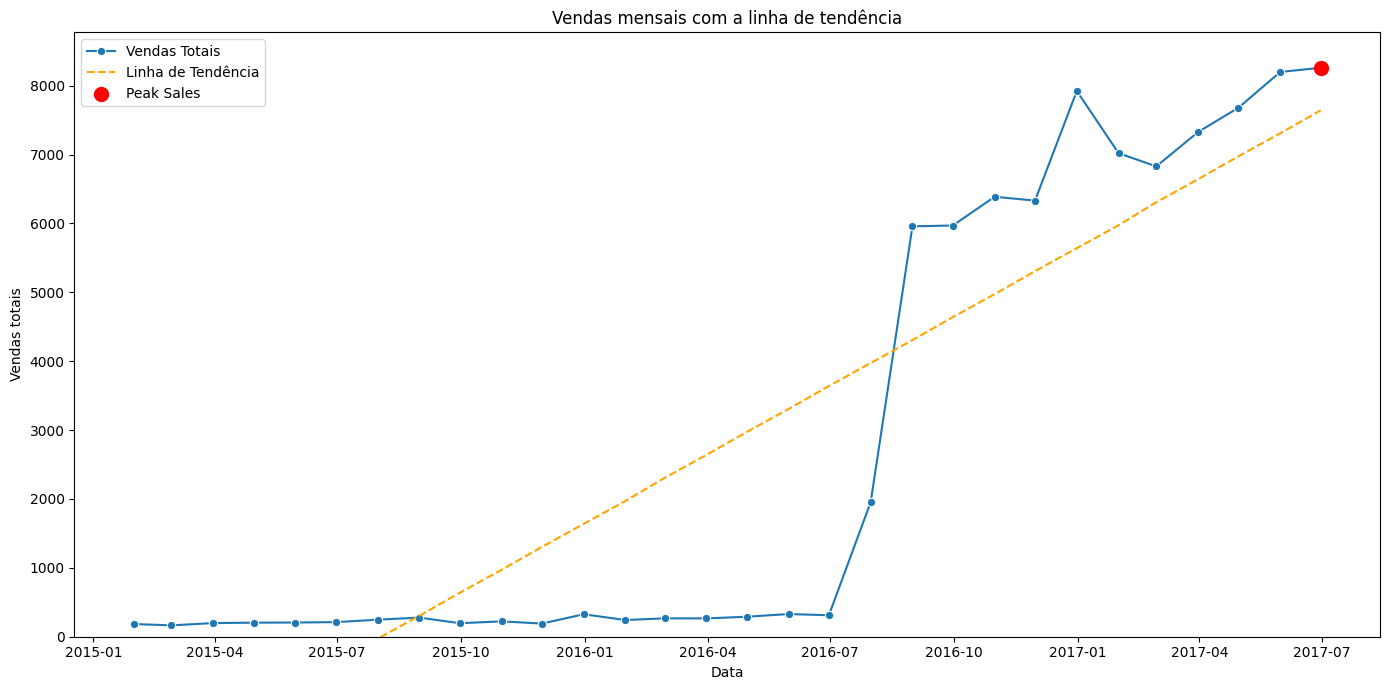

In [31]:
# Plotar os dados
plt.figure(figsize=(14, 7))
sns.lineplot(data=vendas_mes, x=vendas_mes.index, y='OrderQuantity', marker='o', label='Vendas Totais')
sns.lineplot(data=vendas_mes, x=vendas_mes.index, y='tendencia', linestyle='--', color='orange', label='Linha de Tendência')

peak_sales = vendas_mes[vendas_mes['OrderQuantity'] == vendas_mes['OrderQuantity'].max()]
plt.scatter(peak_sales.index, peak_sales['OrderQuantity'], color='red', s=100, zorder=5, label='Peak Sales')

plt.ylim(bottom=0)


plt.title('Vendas mensais com a linha de tendência')
plt.xlabel('Data')
plt.ylabel('Vendas totais')
plt.legend()
plt.tight_layout()
plt.show()

# Visualização 2
Crie um gráfico de barras que apresente os 10 produtos mais vendidos na categoria de "Bicicletas". O gráfico deve mostrar a quantidade vendida de cada produto e o lucro gerado por produto.

In [26]:
vendas_bikes = pd.read_csv("/content/drive/MyDrive/hackathon/resultados/questao1.csv")
print(vendas_bikes.head())
vendas_bikes = vendas_bikes.drop(['modelname', 'category_name'], axis=1)
vendas_bikes

                   product     modelname category_name  total_quantity
0   Mountain-200 Black, 46  Mountain-200         Bikes             606
1   Mountain-200 Black, 42  Mountain-200         Bikes             602
2  Mountain-200 Silver, 38  Mountain-200         Bikes             586
3  Mountain-200 Silver, 46  Mountain-200         Bikes             571
4   Mountain-200 Black, 38  Mountain-200         Bikes             569


,product,total_quantity
0,"Mountain-200 Black, 46",606
1,"Mountain-200 Black, 42",602
2,"Mountain-200 Silver, 38",586
3,"Mountain-200 Silver, 46",571
4,"Mountain-200 Black, 38",569
5,"Mountain-200 Silver, 42",547
6,"Mountain-400-W Silver, 38",146
7,"Mountain-400-W Silver, 46",135
8,"Mountain-400-W Silver, 42",126
9,"Mountain-400-W Silver, 40",126


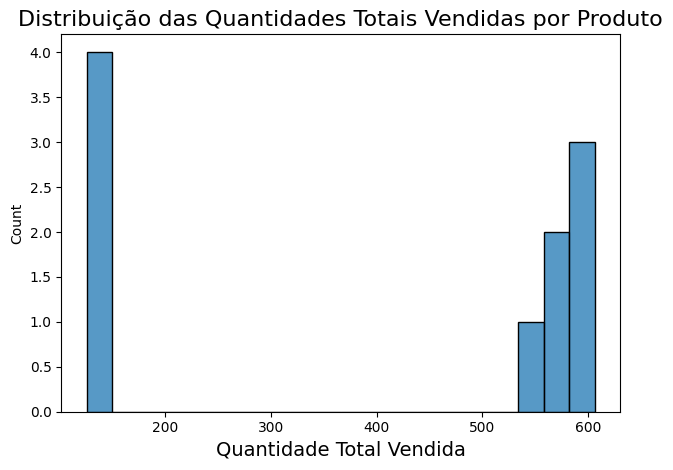

In [30]:
sns.histplot(data=vendas_bikes, x='total_quantity', bins=20)

# Adicionar título e rótulos aos eixos
plt.title('Distribuição das Quantidades Totais Vendidas por Produto', fontsize=16)
plt.xlabel('Quantidade Total Vendida', fontsize=14)

# Ajustar o layout para que os elementos do gráfico fiquem bem organizados
plt.tight_layout()
plt.show()

# Visualização 3
Crie um mapa de calor que ilustre as vendas por região e por mês. As regiões devem estar no eixo Y, os meses no eixo X, e a intensidade da cor deve representar o volume total de vendas. Adicione a capacidade de filtrar por categorias de produtos.

In [51]:
regiao = pd.read_csv("/content/drive/MyDrive/hackathon/adventureWorks/AdventureWorks_Territories.csv")
regiao = regiao.drop(['Continent'], axis=1)
regiao

,SalesTerritoryKey,Region,Country
0,1,Northwest,United States
1,2,Northeast,United States
2,3,Central,United States
3,4,Southwest,United States
4,5,Southeast,United States
5,6,Canada,Canada
6,7,France,France
7,8,Germany,Germany
8,9,Australia,Australia
9,10,United Kingdom,United Kingdom


In [59]:
vendas = pd.read_csv("/content/drive/MyDrive/hackathon/adventureWorks_OK/AdventureWorks_Sales_corrected.csv")
vendas = vendas.drop(['StockDate', 'OrderNumber', 'ProductKey', 'CustomerKey', 'OrderLineItem'], axis=1)
vendas['OrderDate'] = pd.to_datetime(vendas['OrderDate'])
vendas.set_index('OrderDate', inplace=True)

vendas_por_mes = vendas.resample('M').sum()


,TerritoryKey,OrderQuantity
OrderDate,,
2015-01-01,1,1
2015-01-01,4,1
2015-01-01,9,1
2015-01-01,6,1
2015-01-02,10,1
...,...,...
2017-06-30,10,2
2017-06-30,10,1
2017-06-30,10,1


In [58]:
grafico = pd.merge(vendas_por_mes, regiao, left_on='TerritoryKey', right_on='SalesTerritoryKey')
grafico



,TerritoryKey,OrderQuantity,SalesTerritoryKey,Region,Country


,TerritoryKey,OrderQuantity,SalesTerritoryKey,Region,Country
0,1,12513,1,Northwest,United States
1,2,40,2,Northeast,United States
2,3,30,3,Central,United States
3,4,17191,4,Southwest,United States
4,5,49,5,Southeast,United States
5,6,10894,6,Canada,Canada
6,7,7862,7,France,France
7,8,7950,8,Germany,Germany
8,9,17951,9,Australia,Australia
9,10,9694,10,United Kingdom,United Kingdom


In [ ]:
X = vendas_mes[['mes']]
y = vendas_mes['OrderQuantity']

# Ajustar o modelo
model = LinearRegression().fit(X, y)

# Prever a linha de tendência
vendas_mes['tendencia'] = model.predict(X)

# Visualização 4
Crie um gráfico de dispersão que mostre a relação entre o número de vendas e o valor total das vendas por cliente. Adicione uma linha de regressão para destacar a tendência.

# Visualização 5
Crie um gráfico de barras empilhadas que compare as vendas mensais de dois anos consecutivos. O gráfico deve permitir uma análise detalhada das tendências de crescimento ou declínio por categoria de produto.